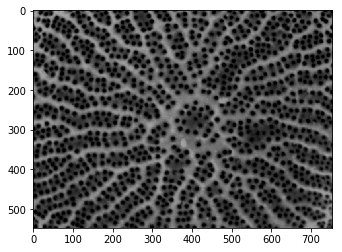

In [95]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2

img=mpimg.imread('cropped_Wild052.tif')
imgplot = plt.imshow(img)

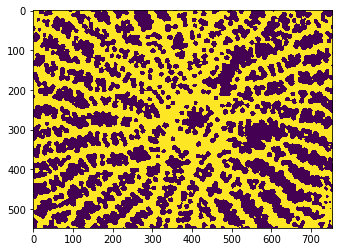

In [96]:
from skimage.morphology import dilation
ero_img=dilation(lum_img)
image=plt.subplot()
image.imshow(ero_img)

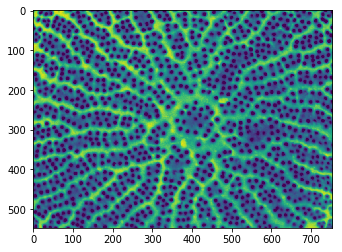

In [97]:
lum_img = img[:,:,0]
plt.imshow(lum_img)

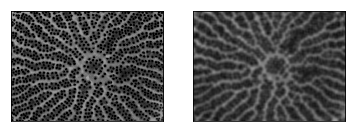

In [114]:
#trying to smooth an image
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cropped_Wild052.tif')
blur = cv2.blur(img,(18, 18))
plt.subplot(121),plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur)
plt.xticks([]), plt.yticks([])
plt.show()
#for future, showing the plot is unnecessary; can leave that out and put it at the top

In [115]:
#trying to blur the erosion
#from skimage.morphology import binary_erosion
#ero_img=binary_erosion(lum_img)
#image=plt.subplot()
#image.imshow(ero_img)

#img2= cv2.imread(ero_img)
#ero_blur = cv2.blur(ero_img,(12, 12))
#plt.subplot(121),plt.imshow(ero_img)
#plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(ero_blur)
#plt.xticks([]), plt.yticks([])
#plt.show()
#for future, showing the plot is unnecessary; can leave that out and put it at the top

In [116]:
#non blurred threshold
img2 = cv2.imread('cropped_Wild052.tif', 0)
ret,th= cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)

71.0


In [117]:
#blurred threshold
from skimage.filters import threshold_otsu
th=threshold_otsu(blur)
print(th)

71


/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (548, 754, 3) looks like an RGB image
  warn(msg.format(image.shape))


In [118]:
#eroded threshold
from skimage.filters import threshold_otsu
th_of_ero=threshold_otsu(ero_img)
print(th_of_ero)

0.001953125


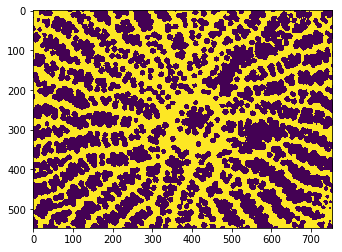

In [119]:
#non blurred threshold plotted
lum_img = img[:,:,0] > ret
imgplot = plt.imshow(lum_img)

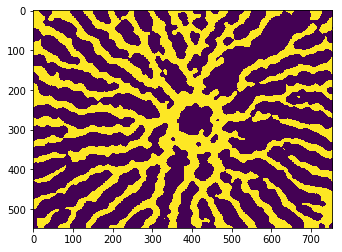

In [120]:
#blurred threshold plotted
blur_img = blur[:,:,0] > th
blurimgplot=plt.imshow(blur_img)

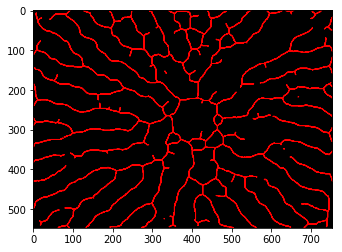

In [121]:
#using blurred
from skimage.morphology import skeletonize
skeleton = skeletonize(blur_img)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')

In [122]:
#this doesn't work; we're not going to try to fix it unless we need a better overlay later
from numpy import zeros
print(np.shape(skeleton))
print(np.shape(lum_img))

print((skeleton))
#use skeleton and lum_img
(r,c)=(np.shape(skeleton))
print(r,c)
pic = zeros(shape=(r,c,3))
pic[:,:,0]=skeleton*(1-lum_img)+lum_img
pic[:,:,1]=(1-skeleton)*lum_img
pic[:,:,2]=(1-skeleton)*lum_img

print(pic)

from PIL import Image
#yayihope = Image.fromarray(pic, 'RGB')
#yayihope.show()
#draw=Image.open('cropped_Wild052.tif')
#draw.show()

(548, 754)
(548, 754)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
548 754
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


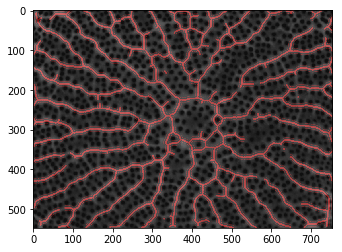

In [123]:
#blurred
img=mpimg.imread('cropped_Wild052.tif')
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(skeleton, cmap=red2, interpolation='sinc', alpha=.42) 
plt.show()

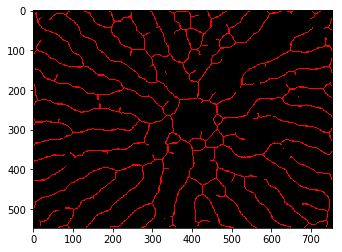

In [124]:
from skimage.morphology import dilation
newskel=dilation(skeleton)
myskel=plt.subplot()
myskel.imshow(newskel,cmap=red2)

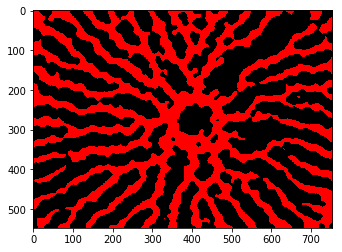

In [125]:
from skimage.morphology import closing, opening
newskel=closing(blur_img)
myskel=plt.subplot()
myskel.imshow(newskel,cmap=red2)